In [3]:
import pandas as pd
import matplotlib.pyplot as plt

    SUBDIVISION  YEAR   JAN   FEB   MAR    APR    MAY     JUN     JUL    AUG  \
0        KERALA  1901  28.7  44.7  51.6  160.0  174.7   824.6   743.0  357.5   
1        KERALA  1902   6.7   2.6  57.3   83.9  134.5   390.9  1205.0  315.8   
2        KERALA  1903   3.2  18.6   3.1   83.6  249.7   558.6  1022.5  420.2   
3        KERALA  1904  23.7   3.0  32.2   71.5  235.7  1098.2   725.5  351.8   
4        KERALA  1905   1.2  22.3   9.4  105.9  263.3   850.2   520.5  293.6   
..          ...   ...   ...   ...   ...    ...    ...     ...     ...    ...   
110      KERALA  2011  20.5  45.7  24.1  165.2  124.2   788.5   536.8  492.7   
111      KERALA  2012   7.4  11.0  21.0  171.1   95.3   430.3   362.6  501.6   
112      KERALA  2013   3.9  40.1  49.9   49.3  119.3  1042.7   830.2  369.7   
113      KERALA  2014   4.6  10.3  17.9   95.7  251.0   454.4   677.8  733.9   
114      KERALA  2015   3.1   5.8  50.1  214.1  201.8   563.6   406.0  252.2   

       SEP    OCT    NOV    DEC  ANNUAL

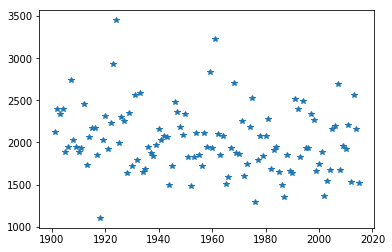

In [10]:
import numpy as np
x=pd.read_csv("flood_data.csv")
y=pd.read_csv("flood_data.csv")
#x=pd.read_csv("rainfall_india_1901-2015.csv")
#y=pd.read_csv("rainfall_india_1901-2015.csv")
print(x)
print(y)
y1=list(x["YEAR"])
x1=list(x["Jun-Sep"])
z1=list(x["JUN"])
w1=list(x["MAY"])

plt.plot(y1, x1,'*')
plt.show()

In [5]:
flood=[]
june=[]
sub=[]

#CREATING A NEW COLOUMN WITH BINARY CLASSIFICATION DEPENDING IF THAT YEAR HAD FLOODED OR NOT, USING RAINFALL OF THAT YEAR AS THRESHOLD
#print(x1[114])
for i in range(0,len(x1)):
    if x1[i]>2400:
        flood.append('1')
    else:
        flood.append('0')

#print(len(x1))

#APPROAXIMATELY FINDING THE RAINFALL DATA FOR 10 DAYS FOR THE MONTH OF JUNE IN EVERY YEAR FROM 1901 TO 2015
for k in range(0,len(x1)):
    june.append(z1[k]/3)

#FINDING THE INCREASE IN RAINFALL FROM THE MONTH OF MAY TO THE MONTH OF JUNE IN EVERY YEAR FROM 1901 TO 2015
for k in range(0,len(x1)):
    sub.append(abs(w1[k]-z1[k]))

#print(len(flood),len(x1))
df = pd.DataFrame({'flood':flood})
df1=pd.DataFrame({'per_10_days':june})

x["flood"]=flood
x["avgjune"]=june
x["sub"]=sub

#SAVING THE NEW CSV FILE WITH THE NEW COLOUMNS
x.to_csv("out1.csv")
print((x))
        
        
      




    SUBDIVISION  YEAR   JAN   FEB   MAR    APR    MAY     JUN     JUL    AUG  \
0        KERALA  1901  28.7  44.7  51.6  160.0  174.7   824.6   743.0  357.5   
1        KERALA  1902   6.7   2.6  57.3   83.9  134.5   390.9  1205.0  315.8   
2        KERALA  1903   3.2  18.6   3.1   83.6  249.7   558.6  1022.5  420.2   
3        KERALA  1904  23.7   3.0  32.2   71.5  235.7  1098.2   725.5  351.8   
4        KERALA  1905   1.2  22.3   9.4  105.9  263.3   850.2   520.5  293.6   
..          ...   ...   ...   ...   ...    ...    ...     ...     ...    ...   
110      KERALA  2011  20.5  45.7  24.1  165.2  124.2   788.5   536.8  492.7   
111      KERALA  2012   7.4  11.0  21.0  171.1   95.3   430.3   362.6  501.6   
112      KERALA  2013   3.9  40.1  49.9   49.3  119.3  1042.7   830.2  369.7   
113      KERALA  2014   4.6  10.3  17.9   95.7  251.0   454.4   677.8  733.9   
114      KERALA  2015   3.1   5.8  50.1  214.1  201.8   563.6   406.0  252.2   

     ...    NOV    DEC  ANNUAL  Jan-Feb

In [6]:
import scipy 
from scipy.stats import spearmanr

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

C:\Users\aksha\AppData\Roaming\Python\Python35\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [7]:


#TAKING THE COLOUMNS WHICH ARE TO USED FOR TRAINING THE MODEL
#16 MAR-MAY
#20- AVG OF 10 DAYS JUNE 
#21- DIFFERENCE OF RAINFALL FROM MAY TO JUNE
#19 - BINARY CLASS OF FLOOD- 0 OR 1
#MORE DATA CAN BE ADDED FOR TRAINING, BY JUST ADDING MORE NUMBER OF COLOUMNS FROM THE CSV FILE

#WE USE LOGISTIC REGRESSION FOR TRAINING

X = x.ix[:,{16,20,21}].values
y1=x.ix[:,19].values

(X_train, X_test, Y_train, Y_test) = train_test_split(X, y1, random_state=0)


#X1= scale(X)
#print(X1)

Lr=LogisticRegression()

Lr.fit(X,y1)
print(Lr.score(X,y1))  # PRINTS THE ACCURACY
#ypred=Lr.score(X_test,Y_test)
#print(ypred)






0.8608695652173913


c:\users\aksha\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.
c:\users\aksha\appdata\local\programs\python\python35\lib\site-packages\pandas\core\indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)
c:\users\aksha\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the do

c:\users\aksha\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]
c:\users\aksha\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


LR: 0.861364 (0.055365)
LDA: 0.862879 (0.092253)
KNN: 0.836364 (0.104326)
CART: 0.790909 (0.127768)
NB: 0.828030 (0.096842)
SVM: 0.861364 (0.055365)


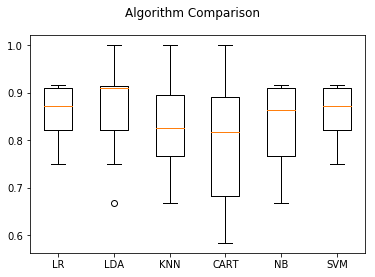

In [8]:
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset
#url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
#names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
X = x.ix[:,{16,20,21}].values
y1=x.ix[:,19].values

(X_train, X_test, Y_train, Y_test) = train_test_split(X, y1, random_state=0)
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y1, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [9]:

q1=275 # present years march to may rainfall data on average
w1=130 #average rainfall in past 10 days of june
e1=260 #average inscrease in rainfall from may to june 

q2=200 # present years march to may rainfall data on average
w2=400 #average rainfall in past 10 days of june
e2=300 #average inscrease in rainfall from may to june 


l=[[q1,w1,e1],[q2,w2,e2],[50,300,205]]

#print(X)

#ypred=Lr.predict(X)
f1=Lr.predict(l)

for i in range(len(f1)):

    if (int(f1[i])==1):
        print(f1[i],"- possibility of  severe flood")
    else:
        print(f1[i],"- no chance of severe flood")
    
        
"""
print("data1 prediction",f1[0],"=")
print("data2 prediction",f1[1])
"""

0 - no chance of severe flood
1 - possibility of  severe flood
1 - possibility of  severe flood


'\nprint("data1 prediction",f1[0],"=")\nprint("data2 prediction",f1[1])\n'